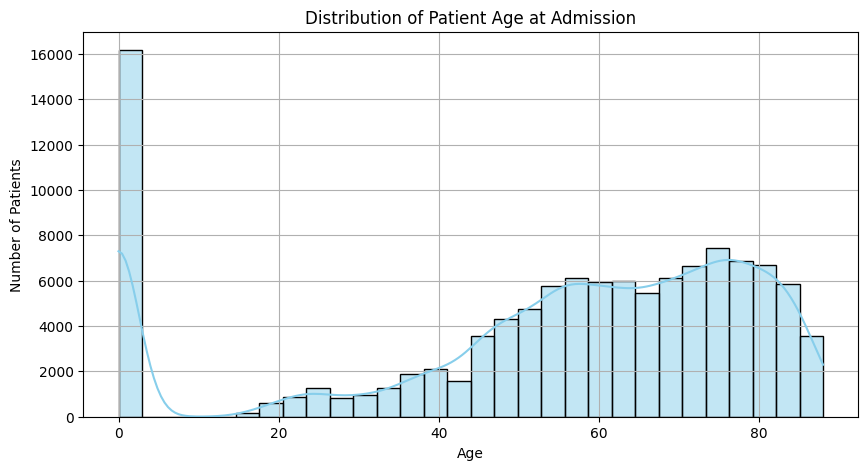

<ipython-input-3-4569b92b3d24>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="GENDER", y="AGE", data=merged_df, palette="pastel", inner="box")


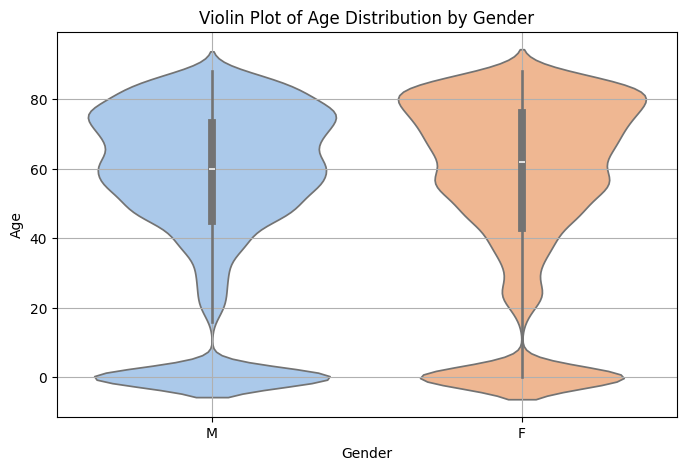

<ipython-input-3-4569b92b3d24>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")


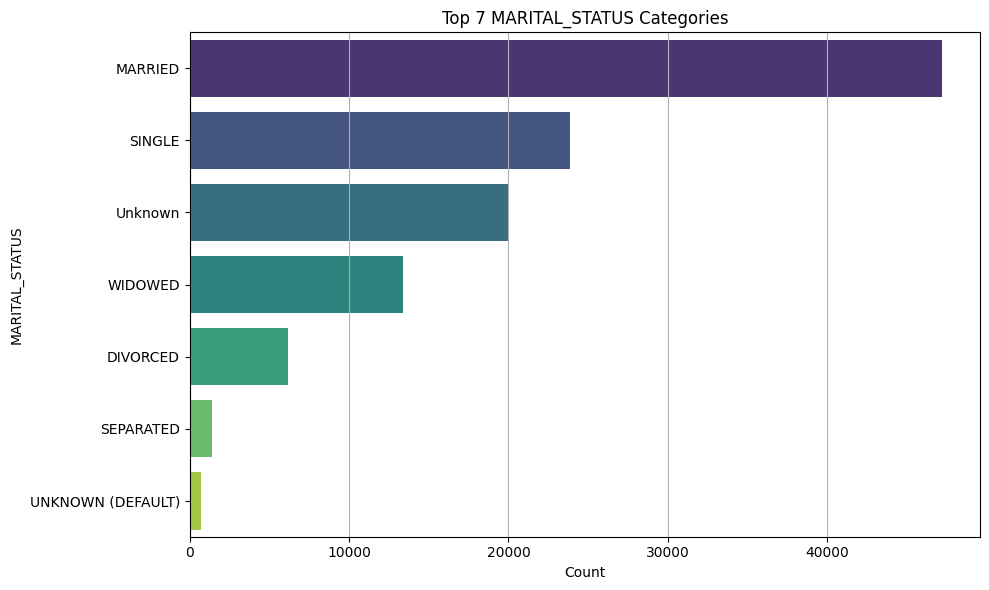

<ipython-input-3-4569b92b3d24>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")


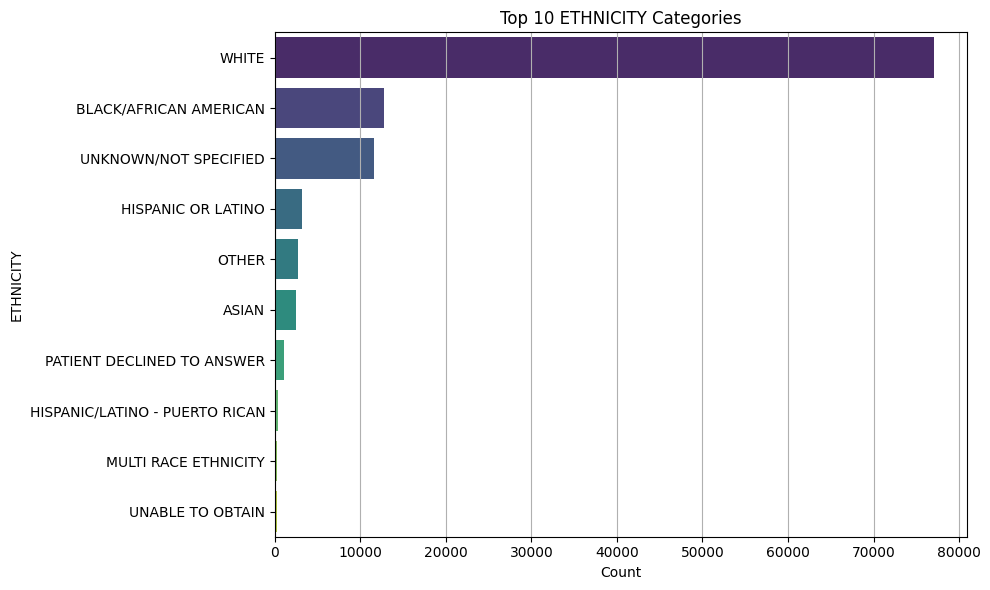

<ipython-input-3-4569b92b3d24>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")


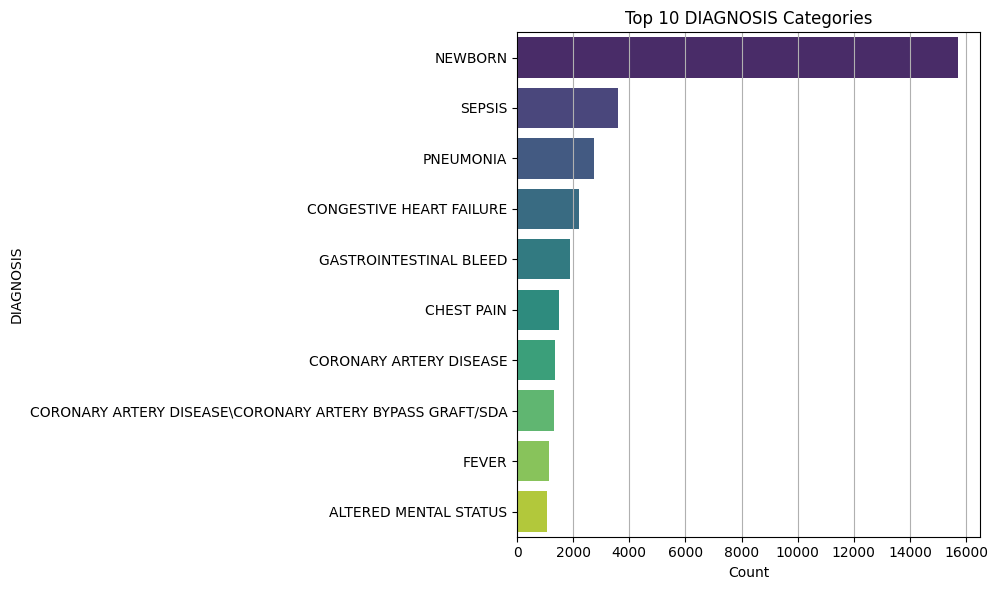

<ipython-input-3-4569b92b3d24>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")


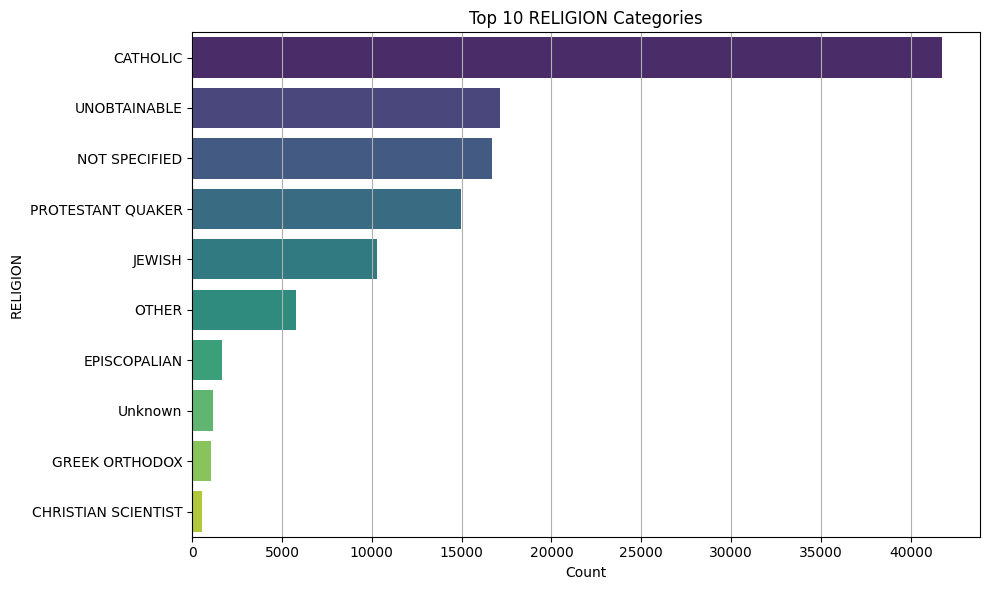

<ipython-input-3-4569b92b3d24>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")


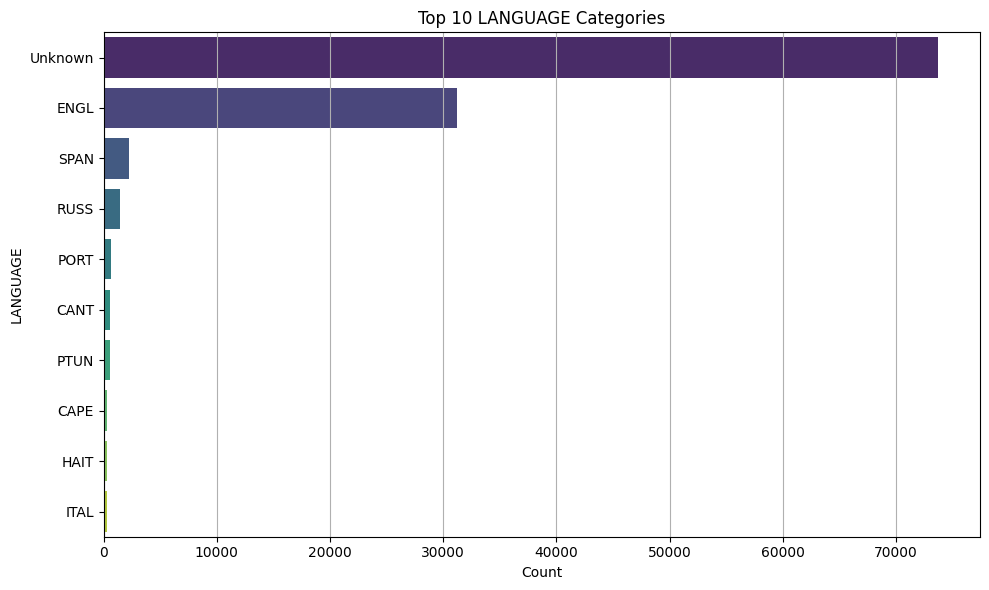

<ipython-input-3-4569b92b3d24>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")


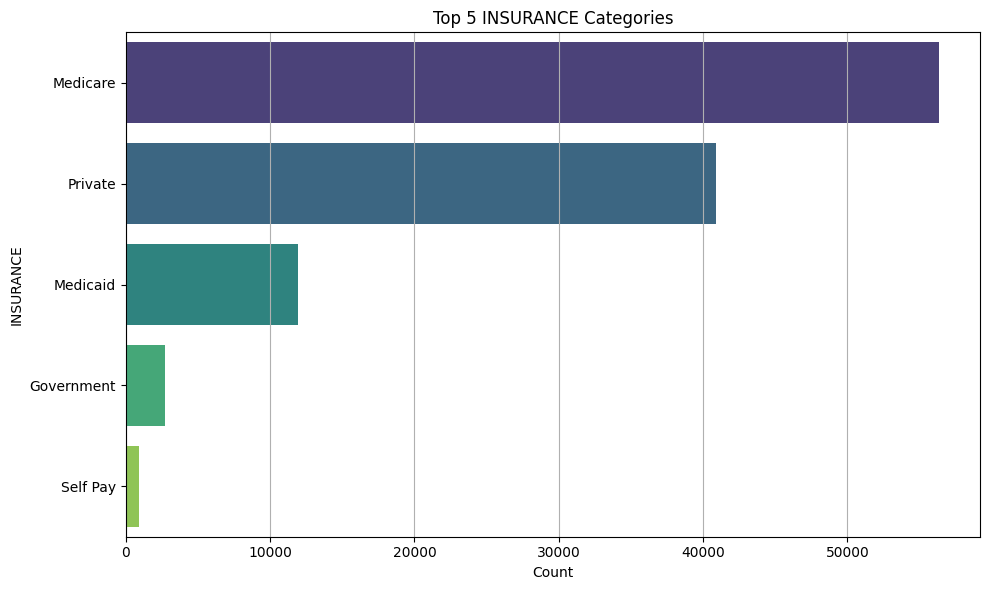

Dropped columns: ['SUBJECT_ID', 'ROW_ID_x']
   HADM_ID  SEQ_NUM ICD9_CODE  ROW_ID_y               SHORT_TITLE  \
0   163353      1.0     V3001   13695.0    Single lb in-hosp w cs   
1   163353      2.0      V053   12202.0  Need prphyl vc vrl hepat   
2   163353      3.0      V290   13688.0    NB obsrv suspct infect   
3   145834      9.0      2639    1642.0   Protein-cal malnutr NOS   
4   145834      7.0      6826    7283.0         Cellulitis of leg   

                                          LONG_TITLE           ADMITTIME  \
0  Single liveborn, born in hospital, delivered b... 2138-07-17 19:04:00   
1  Need for prophylactic vaccination and inoculat... 2138-07-17 19:04:00   
2     Observation for suspected infectious condition 2138-07-17 19:04:00   
3           Unspecified protein-calorie malnutrition 2101-10-20 19:08:00   
4         Cellulitis and abscess of leg, except foot 2101-10-20 19:08:00   

             DISCHTIME DEATHTIME ADMISSION_TYPE  ...    DIAGNOSIS  \
0  2138-07-21 1

<ipython-input-3-4569b92b3d24>:184: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df = merged_df.replace({True: 1, False: 0})



DataFrame after converting True/False to 1/0:
   HADM_ID  SEQ_NUM ICD9_CODE  ROW_ID_y               SHORT_TITLE  \
0   163353      1.0     V3001   13695.0    Single lb in-hosp w cs   
1   163353      1.0     V3001   13695.0    Single lb in-hosp w cs   
2   163353      1.0     V3001   13695.0    Single lb in-hosp w cs   
3   163353      2.0      V053   12202.0  Need prphyl vc vrl hepat   
4   163353      2.0      V053   12202.0  Need prphyl vc vrl hepat   

                                          LONG_TITLE           ADMITTIME  \
0  Single liveborn, born in hospital, delivered b... 2138-07-17 19:04:00   
1  Single liveborn, born in hospital, delivered b... 2138-07-17 19:04:00   
2  Single liveborn, born in hospital, delivered b... 2138-07-17 19:04:00   
3  Need for prophylactic vaccination and inoculat... 2138-07-17 19:04:00   
4  Need for prophylactic vaccination and inoculat... 2138-07-17 19:04:00   

             DISCHTIME DEATHTIME         ADMISSION_LOCATION  ...       AGE  \
0  

In [3]:
# ================================
# PART 1: Load and Merge Data Files
# ================================

import pandas as pd

# Load CSV files
admissions_df = pd.read_csv("/content/ADMISSIONS.csv")
icd_diagnoses_df = pd.read_csv("/content/D_ICD_DIAGNOSES.csv")
diagnoses_icd_df = pd.read_csv("/content/DIAGNOSES_ICD_sorted.csv")
patients_df = pd.read_csv("/content/PATIENTS.csv")

# Merge diagnoses with ICD descriptions
merged_df = diagnoses_icd_df.merge(icd_diagnoses_df, on="ICD9_CODE", how="left")

# Merge with admissions data
merged_df = merged_df.merge(admissions_df, on=["SUBJECT_ID", "HADM_ID"], how="left")

# Drop 'ROW_ID' columns if exist
if 'ROW_ID' in patients_df.columns:
    patients_df = patients_df.drop(columns=['ROW_ID'])
if 'ROW_ID' in merged_df.columns:
    merged_df = merged_df.drop(columns=['ROW_ID'])

# Merge with patient demographics
merged_df = merged_df.merge(patients_df, on="SUBJECT_ID", how="left")

# ================================
# PART 2: Data Preprocessing
# ================================

# Convert date columns to datetime
date_columns = [
    "ADMITTIME", "DISCHTIME", "DEATHTIME",
    "DOB", "DOD", "DOD_HOSP", "DOD_SSN",
    "EDREGTIME", "EDOUTTIME"
]
for col in date_columns:
    if col in merged_df.columns:
        merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')

# Fill missing categorical data with 'Unknown'
categorical_cols = [
    "ADMISSION_TYPE", "ADMISSION_LOCATION", "DISCHARGE_LOCATION",
    "INSURANCE", "LANGUAGE", "RELIGION", "MARITAL_STATUS",
    "ETHNICITY", "SHORT_TITLE", "LONG_TITLE", "DIAGNOSIS"
]
for col in categorical_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna("Unknown")

# Fill numeric NaNs like SEQ_NUM
if 'SEQ_NUM' in merged_df.columns:
    merged_df['SEQ_NUM'] = merged_df['SEQ_NUM'].fillna(0)

merged_df.reset_index(drop=True, inplace=True)

merged_df.to_csv("/content/merged_preprocessed_data.csv", index=False)


# ================================
# PART 3: Calculate Age and Filter
# ================================

import matplotlib.pyplot as plt
import seaborn as sns

# Reload if needed
merged_df = pd.read_csv("/content/merged_preprocessed_data.csv")

merged_df["ADMITTIME"] = pd.to_datetime(merged_df["ADMITTIME"], errors="coerce")
merged_df["DOB"] = pd.to_datetime(merged_df["DOB"], errors="coerce")

merged_df = merged_df.dropna(subset=["DOB", "ADMITTIME"])
merged_df = merged_df[merged_df["DOB"] < merged_df["ADMITTIME"]]

year_diff = merged_df["ADMITTIME"].dt.year - merged_df["DOB"].dt.year
age = year_diff - ((merged_df["ADMITTIME"].dt.month < merged_df["DOB"].dt.month) |
                   ((merged_df["ADMITTIME"].dt.month == merged_df["DOB"].dt.month) &
                    (merged_df["ADMITTIME"].dt.day < merged_df["DOB"].dt.day)))
merged_df["AGE"] = age

merged_df = merged_df[(merged_df["AGE"] >= 0) & (merged_df["AGE"] <= 120)]


# ================================
# PART 4: Plot Age and Categorical Distributions
# ================================

# Plot Age histogram
plt.figure(figsize=(10, 5))
sns.histplot(merged_df["AGE"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Patient Age at Admission")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()

# Plot Age violin plot by gender
plt.figure(figsize=(8, 5))
sns.violinplot(x="GENDER", y="AGE", data=merged_df, palette="pastel", inner="box")
plt.title("Violin Plot of Age Distribution by Gender")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.grid(True)
plt.show()


# Plot categorical variables with bar charts only (no pie charts)
columns_to_plot = ["MARITAL_STATUS", "ETHNICITY", "DIAGNOSIS", "RELIGION", "LANGUAGE", "INSURANCE"]

for col in columns_to_plot:
    top_values = merged_df[col].value_counts().nlargest(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_values.values, y=top_values.index, palette="viridis")
    plt.title(f"Top {len(top_values)} {col} Categories")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()


# ================================
# PART 5: Drop Unwanted Columns
# ================================

columns_to_drop = ['SUBJECT_ID', 'ROW_ID_x']
existing_to_drop = [col for col in columns_to_drop if col in merged_df.columns]

if existing_to_drop:
    merged_df = merged_df.drop(columns=existing_to_drop, errors='ignore')
    print(f"Dropped columns: {existing_to_drop}")
else:
    print("No specified columns to drop found.")

print(merged_df.head())


# ================================
# PART 6: Feature Engineering, Scaling, Encoding
# ================================

# Calculate Length of Stay
if 'ADMITTIME' in merged_df.columns and 'DISCHTIME' in merged_df.columns:
    valid_los_df = merged_df[merged_df['DISCHTIME'] >= merged_df['ADMITTIME']].copy()
    valid_los_df['DISCHTIME'] = pd.to_datetime(valid_los_df['DISCHTIME'], errors='coerce')
    valid_los_df['ADMITTIME'] = pd.to_datetime(valid_los_df['ADMITTIME'], errors='coerce')
    valid_los_df['LENGTH_OF_STAY'] = (valid_los_df['DISCHTIME'] - valid_los_df['ADMITTIME']).dt.days
    merged_df = merged_df.merge(valid_los_df[['HADM_ID', 'LENGTH_OF_STAY']], on='HADM_ID', how='left')
    merged_df['LENGTH_OF_STAY'] = merged_df['LENGTH_OF_STAY'].fillna(0)
    print("\nAdded LENGTH_OF_STAY feature:")
    print(merged_df[['ADMITTIME', 'DISCHTIME', 'LENGTH_OF_STAY']].head())

# Scale numerical features
from sklearn.preprocessing import StandardScaler

num_features = ['AGE', 'LENGTH_OF_STAY']
num_features = [f for f in num_features if f in merged_df.columns]

if num_features:
    scaler = StandardScaler()
    merged_df[num_features] = scaler.fit_transform(merged_df[num_features])
    print("\nScaled Numerical Features:")
    print(merged_df[num_features].head())
else:
    print("\nNumerical features not found for scaling.")

# One-hot encode categorical variables
merged_df = pd.get_dummies(merged_df, columns=['GENDER', 'ADMISSION_TYPE', 'INSURANCE'], drop_first=True)
print("\nDataFrame after One-Hot Encoding:")
print(merged_df.head())
print(merged_df.columns)

merged_df.reset_index(drop=True, inplace=True)
merged_df.to_csv("/content/merged_preprocessed_data_final.csv", index=False)


# ================================
# PART 7: Convert Boolean Columns to Integers and Save
# ================================

merged_df = merged_df.replace({True: 1, False: 0})

print("\nDataFrame after converting True/False to 1/0:")
print(merged_df.head())

merged_df.to_csv("/content/merged_preprocessed_data_final.csv", index=False)
